<a href="https://colab.research.google.com/github/Roopam-kapoor/ML-Algos/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


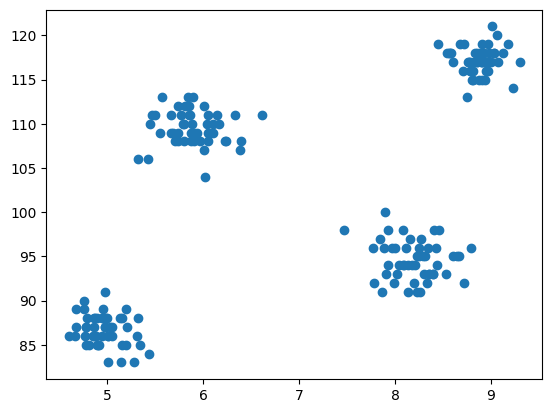

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 563.7685674520721,
 428.84057600000006,
 359.1053112099438,
 250.2728498593278,
 246.64714454617896,
 190.1120586818331]

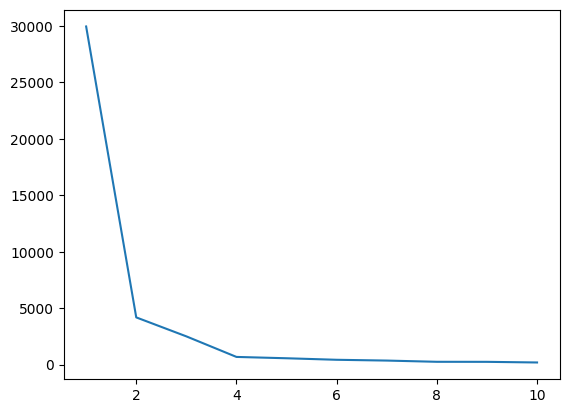

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
km = KMeans(n_clusters=4)
km.fit(df)

KMeans(n_clusters=4)

In [ ]:
x = df.iloc[:, :].values
y_mean = km.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
y_mean

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

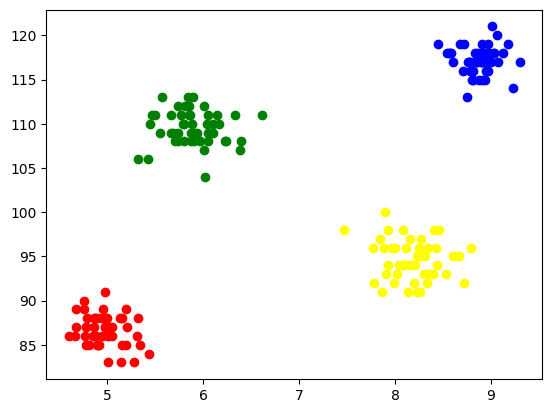

In [ ]:
plt.scatter(x[y_mean == 0, 0], x[y_mean == 0, 1], color = 'blue')
plt.scatter(x[y_mean == 1, 0], x[y_mean == 1, 1], color = 'red')
plt.scatter(x[y_mean == 2, 0], x[y_mean == 2, 1], color = 'green')
plt.scatter(x[y_mean == 3, 0], x[y_mean == 3, 1], color = 'yellow')


In [ ]:
import random

In [ ]:
class Kmenas:
  def __init__(self, n_clusters = 2, max_iter = 100):
    self.clusters = n_clusters
    self.iter = max_iter
    self.centroids = None

  def fit_predict(self, x):
    random_index = random.sample(range(0, x.shape[0]), self.clusters)
    self.centroids = x[random_index]

    for i in range(self.iter):
      cluster_group = self.assign_clusters(x)
      old_centroids = self.centroids
      self.centroids = self.move_centroid(x, cluster_group)

      if(old_centroids == self.centroids).all():
        break

    return cluster_group


  def assign_clusters(self, x):
    cluster_group = []
    distances = []
    for row in x:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)

  def move_centroid(self, x, cluster_group):
    # new_centroid = []
    # cluster_type = np.unique(cluster_group)
    # for type in cluster_type:
    #   new_centroid.append(np.mean(x[cluster_type == type], axis = 0))
    new_centroid = []
    for type in range(self.clusters):
        # Select the points that belong to the current cluster
        points_in_cluster = x[cluster_group == type]
        # If there are points in the cluster, calculate the new centroid
        if len(points_in_cluster) > 0:
            new_centroid.append(np.mean(points_in_cluster, axis=0))
        else:
            # If no points are assigned to this cluster, keep the old centroid
            new_centroid.append(self.centroids[type])


    return np.array(new_centroid)


In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
df = pd.read_csv('student_clustering.csv')

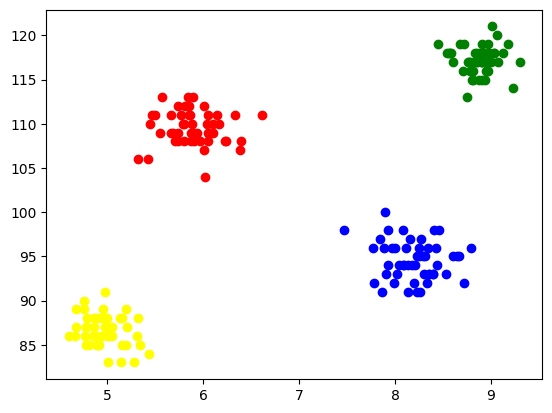

In [ ]:
X = df.iloc[:,:].values

km = Kmenas(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()